# 1 Histograms and AHE

In [ ]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('forest.jpg')
plt.rcParams['figure.figsize'] = [12, 8]
def computeNormGrayHistogram(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    count = np.zeros(32)
    count = [int(i) for i in count]
    bins = list(range(0,33))
    bins = np.array([float(i) for i in bins])
    bins = bins * (255/32)
    for l in range(0,500):
        for i in gray[l]:
            for j in range(0,32):
                if j != 31:                  
                    if ((i>=bins[j]) and (i<bins[j+1])):
                        count[j]=count[j]+1
                if j == 31:
                    if ((i>=bins[j]) and (i<=bins[j+1])):
                        count[j]=count[j]+1
    histNorm = [float(i)/sum(count) for i in count]
    plt.bar(bins[:-1], histNorm, width = 6,align = 'center')
    return histNorm

In [ ]:
plt.figure()
computeNormGrayHistogram(image)

In [ ]:
def computeNormRGBHistogram(image):
    bins = list(range(0,33))
    bins = np.array([float(i) for i in bins])
    bins = bins * (255/32)
    blue_channel = image[:,:,0]
    bl_img = np.zeros(image.shape, dtype=np.uint8) 
    bl_img[:,:,0] = blue_channel
    bcount = np.zeros(32)
    bcount = [int(i) for i in bcount]
    for l in range(0,500):
            for i in blue_channel[l]:
                for j in range(0,32):
                    if j != 31:
                        if ((i>=bins[j]) and (i<bins[j+1])):
                            bcount[j]=bcount[j]+1
                    if j == 31:
                        if ((i>=bins[j]) and (i<=bins[j+1])):
                            bcount[j]=bcount[j]+1
    bhistNorm = [float(i)/sum(bcount) for i in bcount]
    green_channel = image[:,:,1] 
    gr_img = np.zeros(image.shape, dtype=np.uint8) 
    gr_img[:,:,1] = green_channel
    gcount = np.zeros(32)
    gcount = [int(i) for i in gcount]
    for l in range(0,500):
            for i in green_channel[l]:
                for j in range(0,32):
                    if j != 31:
                        if ((i>=bins[j]) and (i<bins[j+1])):
                            gcount[j]=gcount[j]+1
                    if j == 31:
                        if ((i>=bins[j]) and (i<=bins[j+1])):
                            gcount[j]=gcount[j]+1
    ghistNorm = [float(i)/sum(gcount) for i in gcount]
    red_channel = image[:,:,2] 
    rd_img = np.zeros(image.shape, dtype=np.uint8) 
    rd_img[:,:,2] = red_channel
    rcount = np.zeros(32)
    rcount = [int(i) for i in rcount]
    for l in range(0,500):
            for i in red_channel[l]:
                for j in range(0,32):
                    if j != 31:
                        if ((i>=bins[j]) and (i<bins[j+1])):
                            rcount[j]=rcount[j]+1
                    if j == 31:
                        if ((i>=bins[j]) and (i<=bins[j+1])):
                            rcount[j]=rcount[j]+1
    rhistNorm = [float(i)/sum(rcount) for i in rcount]
    concatNorm = []
    concatNorm.extend(bhistNorm)
    concatNorm.append(0)
    concatNorm.extend(ghistNorm)
    concatNorm.append(0)
    concatNorm.extend(rhistNorm)
    concatBins = []
    concatBins.extend(bins)
    concatBins.extend(bins+256)
    concatBins.extend(bins+512)
    red = ['red']*32
    blue = ['blue']*33
    green = ['green']*33
    colors = blue+green+red
    plt.bar(concatBins[:-1],concatNorm, color = colors, width = 6 )
    locs, labels = plt.xticks()  
    plt.xticks(locs, ['', 0, 100, 200, 50, 150, 250, 100, 200,'',''])
    concatNorm = []
    concatNorm.extend(bhistNorm)
    concatNorm.extend(ghistNorm)
    concatNorm.extend(rhistNorm)
    return concatNorm
plt.figure()
computeNormRGBHistogram(image)

In [ ]:
img = np.flip(image, axis=1)
plt.figure()
computeNormGrayHistogram(img)

In [ ]:
plt.figure()
computeNormRGBHistogram(img)

In [ ]:
image = cv2.imread('forest.jpg')
imgdr = image
a = imgdr[:,:,2]
for i in range(0,499):
    for l in range(0,749):
        if a[i,l] > 127:
            a[i,l] = 255
        elif a[i,l] <= 127:
            a[i,l] = a[i,l]*2
imgdr[:,:,2] = a
computeNormGrayHistogram(imgdr)

In [ ]:
computeNormRGBHistogram(imgdr)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#mean 3x3
image = cv2.imread('forest.jpg')
newim0 = np.zeros((502,752))
newim1 = np.zeros((502,752))
newim2 = np.zeros((502,752))
newim0[1:501,1:751] = image[:,:,0]
newim1[1:501,1:751] = image[:,:,1]
newim2[1:501,1:751] = image[:,:,2]
finalim = np.zeros((500,750,3))

for x in range(1,501):
    for y in range(1,751):
        values = [newim0[x,y], newim0[x,y-1],newim0[x,y+1],newim0[x+1,y],newim0[x-1,y],newim0[x+1,y+1],newim0[x+1,y-1],newim0[x-1,y-1],newim0[x-1,y+1]]
        finalim[x-1,y-1,0] = round(sum(values)/9)
for x in range(1,501):
    for y in range(1,751):
        values = [newim1[x,y], newim1[x,y-1],newim1[x,y+1],newim1[x+1,y],newim1[x-1,y],newim1[x+1,y+1],newim1[x+1,y-1],newim1[x-1,y-1],newim1[x-1,y+1]]
        finalim[x-1,y-1,1] = round(sum(values)/9)
for x in range(1,501):
    for y in range(1,751):
        values = [newim2[x,y], newim2[x,y-1],newim2[x,y+1],newim2[x+1,y],newim2[x-1,y],newim2[x+1,y+1],newim2[x+1,y-1],newim2[x-1,y-1],newim2[x-1,y+1]]
        finalim[x-1,y-1,2] = round(sum(values)/9)
        
finalim = np.uint8(finalim)
fim = cv2.cvtColor(finalim, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(fim)
plt.figure()
computeNormGrayHistogram(finalim)
plt.figure()
computeNormRGBHistogram(finalim)

In [ ]:
#mean 9x9
image = cv2.imread('forest.jpg')
newim0 = np.zeros((508,758))
newim1 = np.zeros((508,758))
newim2 = np.zeros((508,758))
newim0[4:504,4:754] = image[:,:,0]
newim1[4:504,4:754] = image[:,:,1]
newim2[4:504,4:754] = image[:,:,2]
finalim = np.zeros((500,750,3))

winSize=9
for x in range(4,504):
    for y in range(4,754):
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim0[startx:endx+1,starty:endy+1]
        finalim[x-4,y-4,0] = round(sum(sum(values))/81)
for x in range(4,504):
    for y in range(4,754):
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim1[startx:endx+1,starty:endy+1]
        finalim[x-4,y-4,1] = round(sum(sum(values))/81)
for x in range(4,504):
    for y in range(4,754):
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim2[startx:endx+1,starty:endy+1]
        finalim[x-4,y-4,2] = round(sum(sum(values))/81)
        
finalim = np.uint8(finalim)
fim = cv2.cvtColor(finalim, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(fim)
plt.figure()
computeNormGrayHistogram(finalim)
plt.figure()
computeNormRGBHistogram(finalim)

In [ ]:
#median 3x3
image = cv2.imread('forest.jpg')
newim0 = np.zeros((502,752))
newim1 = np.zeros((502,752))
newim2 = np.zeros((502,752))
newim0[1:501,1:751] = image[:,:,0]
newim1[1:501,1:751] = image[:,:,1]
newim2[1:501,1:751] = image[:,:,2]
finalim = np.zeros((500,750,3))
winSize=3
for x in range(1,501):
    for y in range(1,751):
        a = []
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim0[startx:endx+1,starty:endy+1]
        a = values.tolist()
        b = a[0]+a[1]+a[2]
        b.sort()
        finalim[x-1,y-1,0] = b[round(len(b)/2)]
for x in range(1,501):
    for y in range(1,751):
        a = []
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim1[startx:endx+1,starty:endy+1]
        a = values.tolist()
        b = a[0]+a[1]+a[2]
        b.sort()
        finalim[x-1,y-1,1] = b[round(len(b)/2)]
for x in range(1,501):
    for y in range(1,751):
        a = []
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim2[startx:endx+1,starty:endy+1]
        values = newim1[startx:endx+1,starty:endy+1]
        a = values.tolist()
        b = a[0]+a[1]+a[2]
        b.sort()
        finalim[x-1,y-1,2] = b[round(len(b)/2)]
        
finalim = np.uint8(finalim)
fim = cv2.cvtColor(finalim, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(fim)
plt.figure()
computeNormGrayHistogram(finalim)
plt.figure()
computeNormRGBHistogram(finalim)

In [ ]:
#median 9x9
image = cv2.imread('forest.jpg')
newim0 = np.zeros((508,758))
newim1 = np.zeros((508,758))
newim2 = np.zeros((508,758))
newim0[4:504,4:754] = image[:,:,0]
newim1[4:504,4:754] = image[:,:,1]
newim2[4:504,4:754] = image[:,:,2]
finalim = np.zeros((500,750,3))
winSize=9
for x in range(4,504):
    for y in range(4,754):
        a = []
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim0[startx:endx+1,starty:endy+1]
        a = values.tolist()
        b = a[0]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6]+a[7]+a[8]
        b.sort()
        finalim[x-4,y-4,0] = b[round(len(b)/2)]
for x in range(4,504):
    for y in range(4,754):
        a = []
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim1[startx:endx+1,starty:endy+1]
        a = values.tolist()
        b = a[0]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6]+a[7]+a[8]
        b.sort()
        finalim[x-4,y-4,1] = b[round(len(b)/2)]
for x in range(4,504):
    for y in range(4,754):
        a = []
        startx = x-(int((winSize-1)/2))
        starty = y-(int((winSize-1)/2))
        endx = x + (int((winSize-1)/2))
        endy = y + (int((winSize-1)/2))
        values = newim2[startx:endx+1,starty:endy+1]
        values = newim1[startx:endx+1,starty:endy+1]
        a = values.tolist()
        b = a[0]+a[1]+a[2]+a[3]+a[4]+a[5]+a[6]+a[7]+a[8]
        b.sort()
        finalim[x-4,y-4,2] = b[round(len(b)/2)]
        
finalim = np.uint8(finalim)
fim = cv2.cvtColor(finalim, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(fim)
plt.figure()
computeNormGrayHistogram(finalim)
plt.figure()
computeNormRGBHistogram(finalim)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('beach.png')
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def AHE(im,winSize):
    image = cv2.copyMakeBorder(im, int((winSize-1)/2), int((winSize-1)/2), int((winSize-1)/2), int((winSize-1)/2), cv2.BORDER_REPLICATE)
    finim = np.zeros((len(im),len(im[0])))
    for x in range(int((winSize-1)/2),len(im)-1):
        for y in range(int((winSize-1)/2),len(im[0])-1):
            rank = 0
            startx = x-(int((winSize-1)/2))
            starty = y-(int((winSize-1)/2))
            endx = x + (int((winSize-1)/2))
            endy = y + (int((winSize-1)/2))
            conReg = image[startx:endx+1,starty:endy+1]
            for i in range(0,winSize-1):
                for j in range(0,winSize-1):
                    if image[x,y] > conReg[i,j]:
                        rank += 1
                finim[x,y] = (rank*255)//(winSize*winSize)       
    return finim
    

In [ ]:
finim = AHE(im,33)

In [ ]:
plt.figure()
plt.imshow(finim,cmap='gray')
plt.figure()
computeNormGrayHistogram(finim)

In [ ]:
image = cv2.imread('beach.png',0)
img = cv2.equalizeHist(image)
plt.figure()
plt.imshow(img,cmap = 'gray')
plt.figure()
computeNormGrayHistogram(img)

# 2 Canny Edge Detection and Hough Transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import cv2
from mpl_toolkits.axes_grid1 import make_axes_locatable

laneimage = cv2.imread('lane.png',0)

k = 1/159 * np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]]) 
gbimg = cv2.filter2D(laneimage,-1,k,borderType=cv2.BORDER_REPLICATE)


plt.rcParams['figure.figsize'] = [12, 8]

In [ ]:
kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gx = ndimage.filters.convolve(gbimg.astype('int32'),kx)

In [ ]:
ky = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gy = ndimage.filters.convolve(gbimg.astype('int32'),ky)

In [ ]:
gradmag = (np.sqrt(gx**2 + gy**2)).astype('uint8')
plt.figure()
plt.imshow(gradmag, cmap='gray')

In [ ]:
gradtheta = np.arctan2(gy.astype('int32'),gx.astype('int32'))
gradtheta = np.nan_to_num(gradtheta)

In [ ]:
graddeg = np.degrees(gradtheta)
roundedgradt = graddeg/45
roundedgradt = np.matrix.round(roundedgradt)
roundedgradt = roundedgradt*45

In [ ]:
padgradmag = np.zeros((507,1024))
padgradmag[1:506,1:1023]=gradmag
NMS = np.zeros((505,1022))
for x in range(1,506):
    for y in range(1,1023):
        if roundedgradt[x-1,y-1] == 90 or roundedgradt[x-1,y-1] == -90:
            values = [padgradmag[x,y+1],padgradmag[x,y-1],padgradmag[x,y]]
            a = max(values)
            if a == padgradmag[x,y]:
                NMS[x-1,y-1] = padgradmag[x,y]
            if a != padgradmag[x,y]:
                NMS[x-1,y-1] = 0
        if roundedgradt[x-1,y-1] == 45 or roundedgradt[x-1,y-1] == -135:
            values = [padgradmag[x+1,y+1],padgradmag[x-1,y-1],padgradmag[x,y]]
            a = max(values)
            if a == padgradmag[x,y]:
                NMS[x-1,y-1] = padgradmag[x,y]
            if a != padgradmag[x,y]:
                NMS[x-1,y-1] = 0
        if roundedgradt[x-1,y-1] == 0 or roundedgradt[x-1,y-1] == -180 or roundedgradt[x-1,y-1] == 180:
            values = [padgradmag[x+1,y],padgradmag[x-1,y],padgradmag[x,y]]
            a = max(values)
            if a == padgradmag[x,y]:
                NMS[x-1,y-1] = padgradmag[x,y]
            if a != padgradmag[x,y]:
                NMS[x-1,y-1] = 0
        if roundedgradt[x-1,y-1] == -45 or roundedgradt[x-1,y-1] == 135:
            values = [padgradmag[x+1,y-1],padgradmag[x-1,y+1],padgradmag[x,y]]
            a = max(values)
            if a == padgradmag[x,y]:
                NMS[x-1,y-1] = padgradmag[x,y]
            if a != padgradmag[x,y]:
                NMS[x-1,y-1] = 0

plt.figure()
plt.imshow(NMS, cmap = 'gray')

In [ ]:
thresh = NMS.copy()
thresh[thresh < 100] = 0
plt.figure()
plt.imshow(thresh,cmap='gray')

In [ ]:
#2.2 Hough Transform
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import cv2

In [ ]:
thetas = np.arange(-90.0, 91.0)
thetas = np.deg2rad(thetas)
rows, columns = thresh.shape
D = np.ceil(np.sqrt(rows * rows + columns * columns))
D = int(D)
rhos = np.linspace(-D, D, D * 2)

cost = np.cos(thetas)
sint = np.sin(thetas)
accumulator = np.zeros((2 * D, len(thetas)), dtype=np.uint64)
yind, xind = np.nonzero(thresh)
for i in range(len(xind)):
    x = xind[i]
    y = yind[i]
    for t in range(len(thetas)):
        rho = round(x * cost[t] + y * sint[t]) + D
        accumulator[rho, t] += 1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(100, 100))
divider = make_axes_locatable(ax)
im = ax.imshow(accumulator,extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
ratio = .7
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
ax.set_title('Hough transform for Lane')
fig.colorbar(im, orientation='horizontal',shrink= .08)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Lines Plotted on Lane Image')
ax.imshow(laneimage,extent=[0, len(laneimage[0]), 0, len(laneimage)])
for x in range(0,len(accumulator)):
    for y in range(0,len(accumulator[0])):
        if accumulator[x,y] > 100:
            theta = thetas[y]
            rho = rhos[x]
            m = -np.cos(theta)/np.sin(theta)
            b = rho/np.sin(theta)
            xpoints = np.array(list(range(0,len(laneimage[0]+1))))
            ypoints = m*xpoints + b + 60
            plt.plot(xpoints,ypoints)
            

In [ ]:
print(np.degrees(-0.9599310885968813))
print(np.degrees(-0.9075712110370514))
print(np.degrees(0.9773843811168246))
print(np.degrees(0.9424777960769379))
print(np.degrees(0.9075712110370514))

In [ ]:
test = np.uint8(np.zeros((11,11)))
test[0,0] = 1
test[10,10]= 1
test[0,10] = 1
test[10,0] = 1
test[5,5] = 1

thetas = np.arange(-90.0, 91.0)
thetas = np.deg2rad(thetas)
rows, columns = test.shape
D = np.ceil(np.sqrt(rows * rows + columns * columns))
D = int(D)
rhos = np.linspace(-D, D, D * 2)

cost = np.cos(thetas)
sint = np.sin(thetas)

testaccumulator = np.zeros((2 * D, len(thetas)), dtype=np.uint64)
yind, xind = np.nonzero(test)

for i in range(len(x_idxs)):
    x = xind[i]
    y = yind[i]
    for t in range(len(thetas)):
        rho = round(x * cost[t] + y * sint[t]) + D
        testaccumulator[rho, t] += 1



In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='10%', pad=.5)
im = ax.imshow(testaccumulator,extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
ax.set_aspect('equal', adjustable='box')
ax.set_title('Hough transform for Test')
fig.colorbar(im, cax=cax, orientation='horizontal')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Lines Plotted on Test')
ax.imshow(test,extent=[0, len(test), 0, len(test[0])])
for x in range(0,len(testaccumulator)):
    for y in range(0,len(testaccumulator[0])):
        if testaccumulator[x,y] > 2:
            theta = thetas[y]
            rho = rhos[x]
            m = -np.cos(theta)/np.sin(theta)
            b = rho/np.sin(theta)
            xpoints = np.array(list(range(0,12)))
            ypoints = m*xpoints + b
            plt.plot(xpoints,ypoints)
            

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
lines = cv2.HoughLines(test,1,np.pi,0)
#print(lines)
start = []
end = []
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        start.append([x1,y1])
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        end.append([x2,y2])
print(end)
print(start)
fig, ax = plt.subplots()
x = range(300)
ax.imshow(birds1, extent=[start, 179, 996, -94])
ax.plot(x, x, '-', linewidth=5, color='firebrick')
ax.plot(x, x, '-', linewidth=5, color='firebrick')
print(testaccumulator.shape)

# 3 Detecting Objects with Template Matching

(607, 882)
(718, 990)


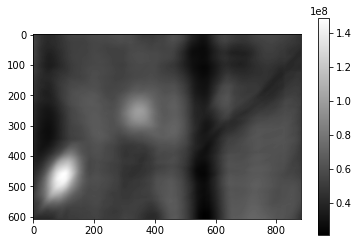

In [13]:
#3.1 Cross Correlation Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

template = cv2.imread('template.jpeg',0)
birds1 = cv2.imread('birds1.jpeg',0)
convim = signal.convolve2d(birds1.astype('int32'),np.fliplr(template.astype('int32')), 'valid')
plt.figure()
plt.imshow(convim, cmap = "gray")
plt.colorbar()
print(convim.shape)
print(birds1.shape)

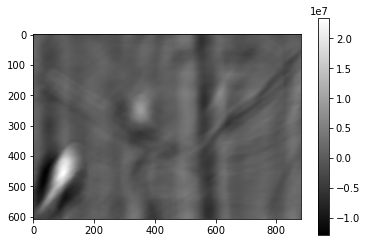

In [2]:
img = birds1.astype('int32') - birds1.mean().astype('int32')
temp = template.astype('int32') - template.mean().astype('int32')
num = signal.convolve2d(img,np.fliplr(temp), 'valid')
plt.figure()
plt.imshow(num, cmap = "gray")
plt.colorbar()

In [9]:
template = cv2.imread('template.jpeg',0)
birds1 = cv2.imread('birds1.jpeg',0)
temp = template.astype('int32')-template.mean().astype('int32')
ncc = np.float64(np.zeros((len(birds1)-len(template)+1,len(birds1[1])-len(template[1])+1)))
den = np.float64(np.zeros((len(birds1)-len(template)+1,len(birds1[1])-len(template[1])+1)))
num = np.float64(np.zeros((len(birds1)-len(template)+1,len(birds1[1])-len(template[1])+1)))
for x in range(0,len(birds1)-len(template)):
    for y in range(0,len(birds1[1])-len(template[1])):
        img = birds1[x:x+len(template),y:y+len(template[1])]
        im = img.astype('int32')-img.mean().astype('int32')
        imsq = np.multiply(im,im)
        imsum = sum(sum(imsq))
        den[x,y] = np.sqrt(imsum * sum(sum(temp**2)))
        num[x,y] = sum(sum(np.multiply(im,temp)))
        ncc[x,y] = num[x,y]/den[x,y]

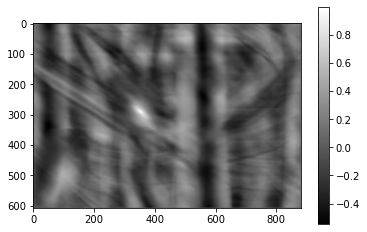

In [10]:
plt.figure()
plt.imshow(ncc, cmap = "gray")
plt.colorbar()

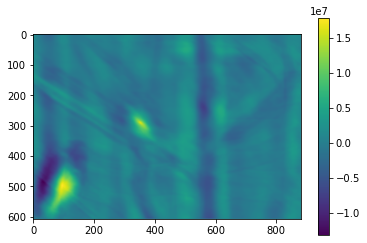

In [11]:
plt.figure()
plt.imshow(num)
plt.colorbar()

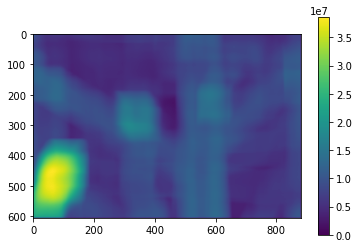

In [12]:
plt.figure()
plt.imshow(den)
plt.colorbar()

In [ ]:
max_xy = np.where(ncc == ncc.max())
print(max_xy)
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(birds1, cmap= 'gray')
rect = patches.Rectangle((353, 290), len(template), len(template[1]), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [ ]:
template = cv2.imread('template.jpeg',0)
birds2 = cv2.imread('birds2.jpeg',0)
temp = template-template.mean()
ncc2 = np.zeros((len(birds2)-len(template)+1,len(birds2[1])-len(template[1])+1))
den2 = np.zeros((len(birds2)-len(template)+1,len(birds2[1])-len(template[1])+1))
num2 = np.zeros((len(birds2)-len(template)+1,len(birds2[1])-len(template[1])+1))
for x in range(0,len(birds2)-len(template)):
    for y in range(0,len(birds2[1])-len(template[1])):
        img = birds2[x:x+len(template),y:y+len(template[1])]
        im = img-img.mean()
        imsq = np.multiply(im,im)
        imsum = sum(sum(imsq))
        den2[x,y] = np.sqrt(imsum * sum(sum(temp)))
        num2[x,y] = sum(sum(np.multiply(im,temp)))
        ncc2[x,y] = num2[x,y]/den2[x,y]

In [ ]:
plt.figure()
plt.imshow(ncc2, cmap = "gray")
plt.colorbar()

In [ ]:
max_xy = np.where(ncc2 == ncc2.max())
print(max_xy)
fig, ax = plt.subplots()
ax.imshow(birds2, cmap= 'gray')
rect = patches.Rectangle((272, 248), len(template), len(template[1]), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()